In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('max_colwidth',1000)

## Read the data
Read the pkl file

In [2]:
# Load the loan data
df_raw = pd.read_pickle('loan_data.pkl')

In [3]:
# Load the dictionary from Lending Club data
loan_dict = pd.read_excel(open('LCDataDictionary.xlsx','rb'), sheet_name='LoanStats')

### Plot the loan_status
Plot the loan status and see the distribution.

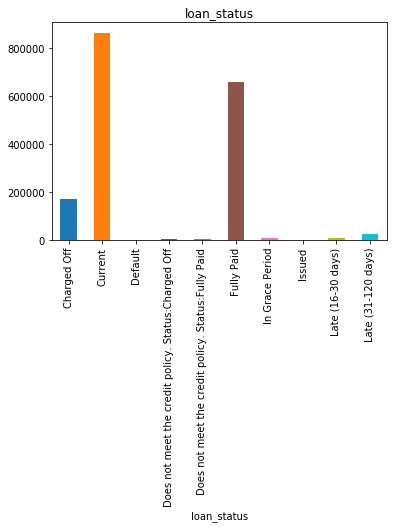

In [4]:
# Let's plot the status first.
df_raw.groupby('loan_status').size().plot(kind='bar', title='loan_status')

### Decide what to predict
One important thing we need to do is to keep only the "Fully Paid", "Charged Off" and "Default" loan_status. Everything else is related to the ongoing loans. We can use ongoing loans in our analysis as we don't know if the loan will be defaulted or successfully paid in future.
For good loans, we will use the label "Fully Paid" and for the bad loans, we will combine the "Charged Off" and "Default".

In [5]:
# For our analysis purpose, we can take only the "Fully Paid", "Charged Off" and "Default"
df = df_raw.loc[df_raw['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]

# Henceforth, we will work only with df
# Last time when I printed there were two categories from bad loan. "Default" and "Charged Off"
# Merge both of them
df.loc[df['loan_status'] == 'Default', 'loan_status'] = 'Charged Off'

/home/anilraj/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Remove data which are not available during loan procurement
The data contains a lot of field related to late payment, or payment plan and settlement and others which are not available during the beginning of the loan. Hence, we remove all such entries from the data.

In [7]:
# Looking at all the columns, the following columns are not valid as they calculated after the loan is approved
remove_from_df = ['pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
                  'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
                  'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'delinq_amnt', 
                  'hardship_flag', 'hardship_reason', 'hardship_status', 'deferral_term',
                  'hardship_amount', 'hardship_start_date', 'hardship_end_date',
                  'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
                  'hardship_loan_status', 'orig_projected_additional_accrued_interest',
                  'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
                  'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status',
                  'settlement_date', 'settlement_amount', 'settlement_percentage',
                  'settlement_term', 'last_pymnt_amnt', 'last_pymnt_d', 'sec_app_earliest_cr_line']

# Here is the meaning of all these fields
loan_dict.loc[loan_dict['LoanStatNew'].isin(remove_from_df)]

,LoanStatNew,Description
11,collection_recovery_fee,post charge off collection fee
14,delinq_amnt,The past-due amount owed for the accounts on which the borrower is now delinquent.
39,last_pymnt_amnt,Last total payment amount received
40,last_pymnt_d,Last month payment was received
80,out_prncp,Remaining outstanding principal for total amount funded
81,out_prncp_inv,Remaining outstanding principal for portion of total amount funded by investors
88,pymnt_plan,Indicates if a payment plan has been put in place for the loan
89,recoveries,post charge off gross recovery
105,total_pymnt,Payments received to date for total amount funded
106,total_pymnt_inv,Payments received to date for portion of total amount funded by investors


In [8]:
# Dropping all those columns
# Using try-except as some of them were already removed in the previous python script (csv2dataframe.ipynb)
try:
    df.drop(remove_from_df, axis=1, inplace=True)
except:
    pass

In [9]:
print(df.shape)

(831997, 130)


We have 833461 rows of data with 130 features

In [10]:
"""
len(df.loc[df['last_credit_pull_d'] == '0'])
"""

"\nlen(df.loc[df['last_credit_pull_d'] == '0'])\n"

In [11]:
"""
# Simply remove all the entris with NaN (Should have done in the beginning)
# for row in np.where(pd.isnull(df))[0][::-1]: # [::-1] reverses the array. Deleting from the. Otherwise the row numbers change.
    # print(row)
    # df.drop(row)
    
print(len(df))
# np.where(pd.isnull(df))
df.drop(df.index[np.where(pd.isnull(df))[0]], inplace=True)
print(len(df))
"""

'\n# Simply remove all the entris with NaN (Should have done in the beginning)\n# for row in np.where(pd.isnull(df))[0][::-1]: # [::-1] reverses the array. Deleting from the. Otherwise the row numbers change.\n    # print(row)\n    # df.drop(row)\n    \nprint(len(df))\n# np.where(pd.isnull(df))\ndf.drop(df.index[np.where(pd.isnull(df))[0]], inplace=True)\nprint(len(df))\n'

In [12]:
"""
# These entries can be made two separate entries - issue_d_year, issue_d_month
# Borrowing ideas from here: https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns

# For all the date kind of entries, change it to numerics.
# And delete the original entry

# import calendar
# df = df.join(df['issue_d'].str.split('-', 1, expand=True))
# df['mon'] = df['mon'].apply(lambda x: calendar.month_name[x])

month_lookup = {'Jan': '01', 
                'Feb': '02', 
                'Mar': '03',
                'Apr': '04', 
                'May': '05', 
                'Jun': '06', 
                'Jul': '07', 
                'Aug': '08', 
                'Sep': '09', 
                'Oct': '10', 
                'Nov': '11', 
                'Dec': '12'}

for item in ['issue_d', 'earliest_cr_line', 'last_credit_pull_d']:
    df[item + '_mon'], df[item + '_yr'] = df[item].str.split('-', 1).str
    df[item + '_mon'] = df[item + '_mon'].apply(lambda x: month_lookup[x])
    # try:
        # df[item + '_mon'] = df[item + '_mon'].apply(lambda x: month_lookup[x])
    # except:
        # # Throw away anytime the conversion doesn't work. We have enough data.
        # df.drop(item + '_mon', axis=1, inplace=True)
    df.drop(item, axis=1, inplace=True)
"""

"\n# These entries can be made two separate entries - issue_d_year, issue_d_month\n# Borrowing ideas from here: https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns\n\n# For all the date kind of entries, change it to numerics.\n# And delete the original entry\n\n# import calendar\n# df = df.join(df['issue_d'].str.split('-', 1, expand=True))\n# df['mon'] = df['mon'].apply(lambda x: calendar.month_name[x])\n\nmonth_lookup = {'Jan': '01', \n                'Feb': '02', \n                'Mar': '03',\n                'Apr': '04', \n                'May': '05', \n                'Jun': '06', \n                'Jul': '07', \n                'Aug': '08', \n                'Sep': '09', \n                'Oct': '10', \n                'Nov': '11', \n                'Dec': '12'}\n\nfor item in ['issue_d', 'earliest_cr_line', 'last_credit_pull_d']:\n    df[item + '_mon'], df[item + '_yr'] = df[item].str.split('-', 1).str\n    df[item + '_mon'] = df[item + '_mon'].ap

In [13]:
"""
# print(df['earliest_cr_line_yr'])
df['earliest_cr_line_yr'] = df['earliest_cr_line_yr'].astype(int)
# Then if year is greater than 20 and less than 1000, then add 19xx
# If year is less than 20 and less than 1000, then add 20xx

print(df['earliest_cr_line_yr'].unique())

mask = (df['earliest_cr_line_yr'] >= 20) & (df['earliest_cr_line_yr'] < 1000)
df.loc[mask, 'earliest_cr_line_yr'] += 1900
print(df['earliest_cr_line_yr'].unique())

mask = (df['earliest_cr_line_yr'] < 20)
df.loc[mask, 'earliest_cr_line_yr'] += 2000
print(df['earliest_cr_line_yr'].unique())

"""

"\n# print(df['earliest_cr_line_yr'])\ndf['earliest_cr_line_yr'] = df['earliest_cr_line_yr'].astype(int)\n# Then if year is greater than 20 and less than 1000, then add 19xx\n# If year is less than 20 and less than 1000, then add 20xx\n\nprint(df['earliest_cr_line_yr'].unique())\n\nmask = (df['earliest_cr_line_yr'] >= 20) & (df['earliest_cr_line_yr'] < 1000)\ndf.loc[mask, 'earliest_cr_line_yr'] += 1900\nprint(df['earliest_cr_line_yr'].unique())\n\nmask = (df['earliest_cr_line_yr'] < 20)\ndf.loc[mask, 'earliest_cr_line_yr'] += 2000\nprint(df['earliest_cr_line_yr'].unique())\n\n"

### Analyze features
Starting with zip_code, analyze features.

For zip_code, the data is in the form 951xx. We will get rid of the xx and keep 951.

The following code generates the histogram of the data.
In case, when the data is not numeric, it does three things.
1. Generate a bar-chart. The equivalent of histogram.
2. Do one-hot encoding using get_dummies.
3. Drop the original column name.


In [14]:
# Now take care of zip codes also
print(df['zip_code'].unique())

# A simple replacement should do the trick
df['zip_code'] = df['zip_code'].str.replace("xx","")
# And convert to numeric
df['zip_code'] = pd.to_numeric(df['zip_code'])
print(df['zip_code'].unique())

['860xx' '309xx' '606xx' '917xx' '972xx' '852xx' '280xx' '900xx' '958xx'
 '774xx' '853xx' '913xx' '245xx' '951xx' '641xx' '921xx' '067xx' '890xx'
 '770xx' '335xx' '799xx' '605xx' '150xx' '326xx' '564xx' '141xx' '080xx'
 '330xx' '974xx' '934xx' '405xx' '946xx' '445xx' '850xx' '604xx' '292xx'
 '088xx' '180xx' '029xx' '700xx' '010xx' '441xx' '104xx' '061xx' '616xx'
 '947xx' '914xx' '765xx' '980xx' '017xx' '752xx' '787xx' '077xx' '540xx'
 '225xx' '440xx' '437xx' '559xx' '912xx' '325xx' '300xx' '923xx' '352xx'
 '013xx' '146xx' '074xx' '786xx' '937xx' '331xx' '115xx' '191xx' '114xx'
 '908xx' '902xx' '992xx' '750xx' '950xx' '329xx' '226xx' '614xx' '802xx'
 '672xx' '083xx' '100xx' '926xx' '931xx' '712xx' '060xx' '707xx' '342xx'
 '895xx' '430xx' '919xx' '996xx' '891xx' '935xx' '801xx' '928xx' '233xx'
 '927xx' '970xx' '211xx' '303xx' '070xx' '194xx' '263xx' '403xx' '301xx'
 '553xx' '993xx' '312xx' '432xx' '602xx' '216xx' '151xx' '971xx' '305xx'
 '334xx' '050xx' '129xx' '925xx' '483xx' '760xx' '9

/home/anilraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


[860 309 606 917 972 852 280 900 958 774 853 913 245 951 641 921  67 890
 770 335 799 605 150 326 564 141  80 330 974 934 405 946 445 850 604 292
  88 180  29 700  10 441 104  61 616 947 914 765 980  17 752 787  77 540
 225 440 437 559 912 325 300 923 352  13 146  74 786 937 331 115 191 114
 908 902 992 750 950 329 226 614 802 672  83 100 926 931 712  60 707 342
 895 430 919 996 891 935 801 928 233 927 970 211 303  70 194 263 403 301
 553 993 312 432 602 216 151 971 305 334  50 129 925 483 760 961 200  85
 981 103 601 117  63 920 543 775 570  38 221 985 113 275 236 148  28 450
 532 729 321 959 941 955 217 880 660  62 193 761 857 306 271 142 956 983
 945 109 112 187 630 435 488 287 705 592 318 549 212 347 274 265 785  27
  89 813  69 260 201 349 322  75 124 940 967 111 773 997  76 538  21 304
 234 308 809  71 363 296 240 830  11 622 207 140 336 619 208 618  14 644
 283 276 631 243 960 181 922 224 975 105 986 218 652 782 410 480 328 719
 982  65  81 954 346 442  25 122 173 282 120  82 76

/home/anilraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [15]:
"""
# Try to convert everything to int
for y in df.columns:
    try:
        df[y] = df[y].astype(int)
    except:
        pass
"""

'\n# Try to convert everything to int\nfor y in df.columns:\n    try:\n        df[y] = df[y].astype(int)\n    except:\n        pass\n'

id


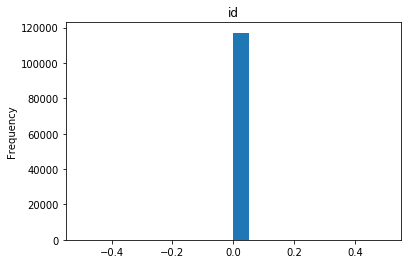

member_id


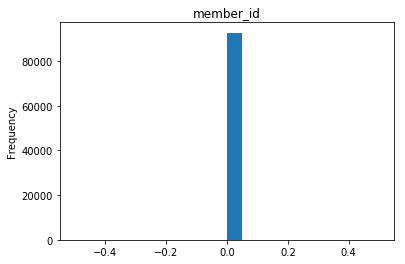

loan_amnt


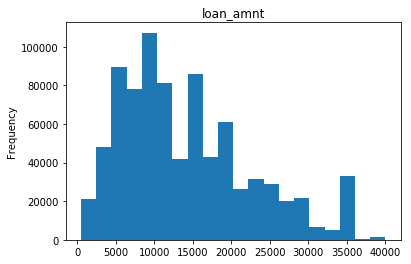

funded_amnt


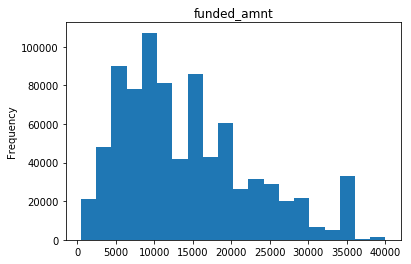

funded_amnt_inv


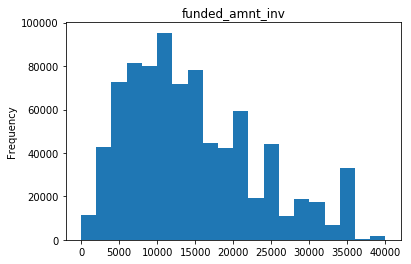

term


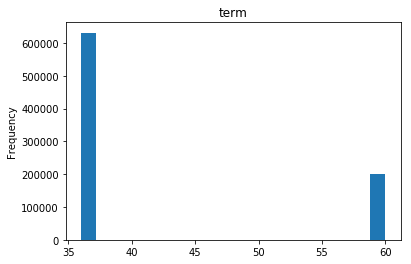

int_rate


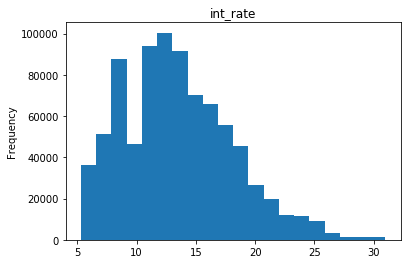

installment


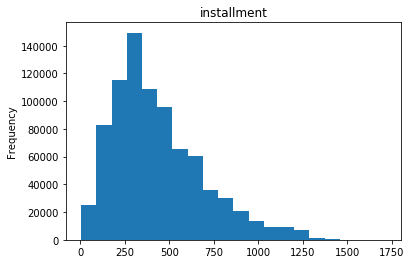

grade
sub_grade
emp_length
home_ownership
annual_inc


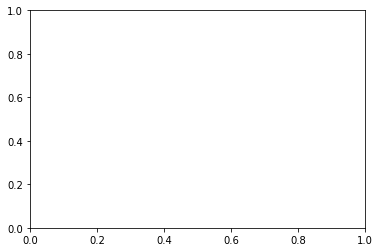

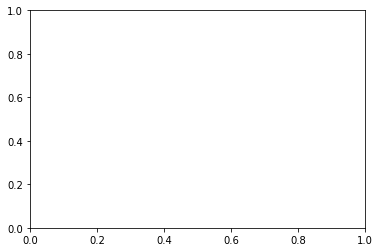

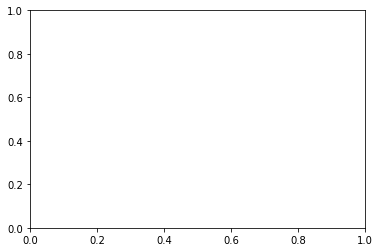

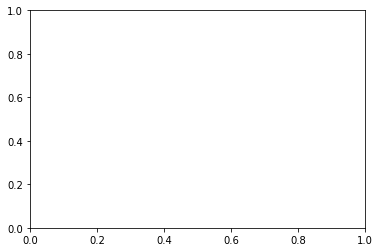

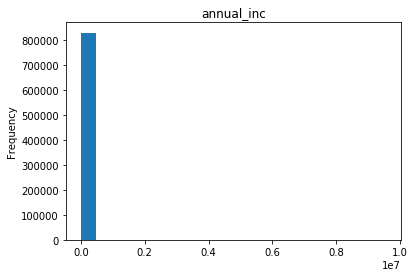

verification_status
loan_status
pymnt_plan
purpose
zip_code


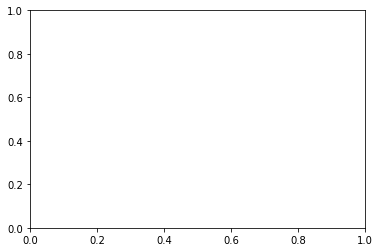

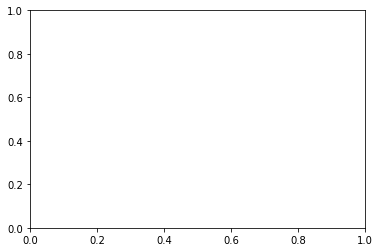

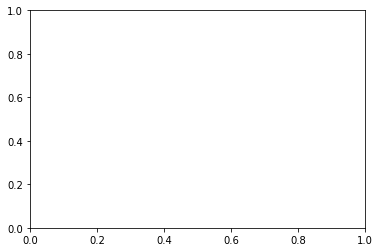

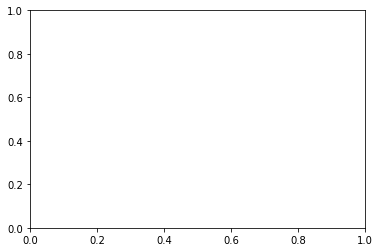

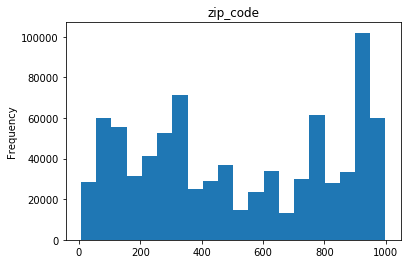

addr_state
dti


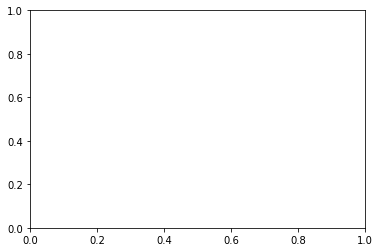

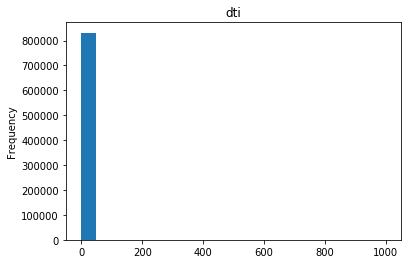

delinq_2yrs


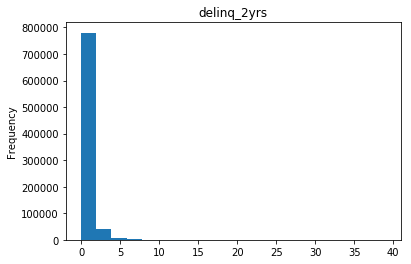

inq_last_6mths


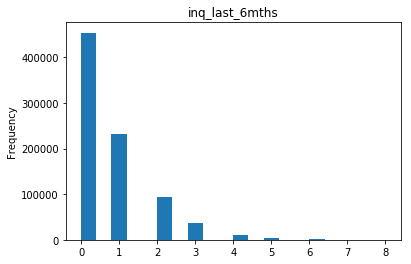

mths_since_last_delinq


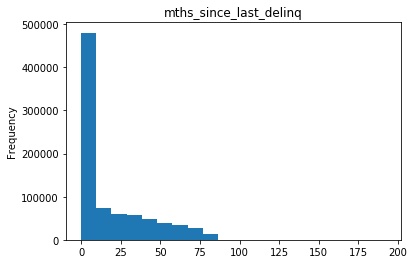

mths_since_last_record


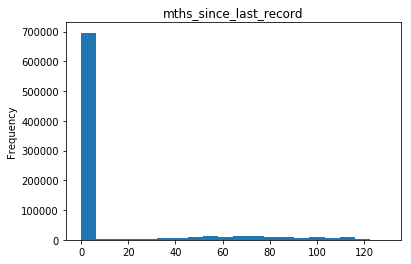

open_acc


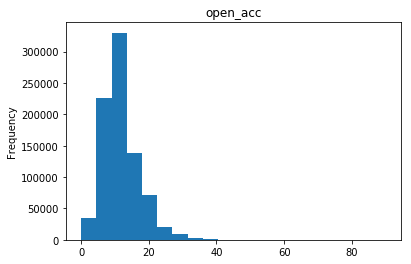

pub_rec


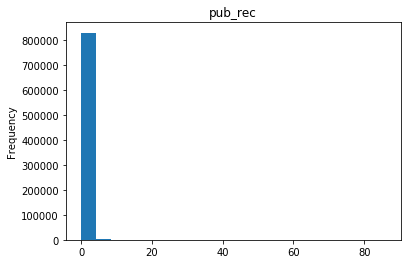

revol_bal


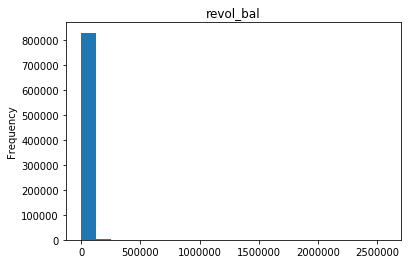

revol_util


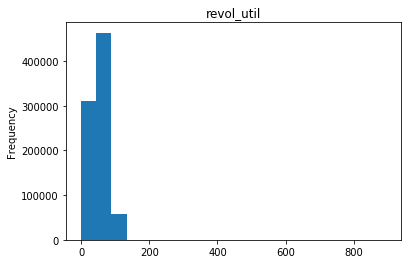

total_acc


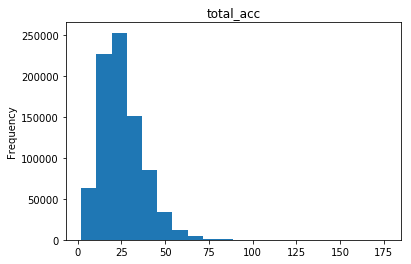

initial_list_status
out_prncp


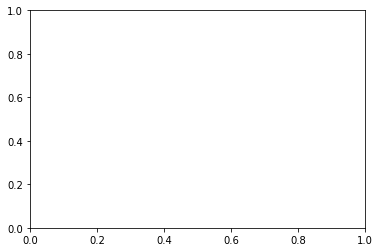

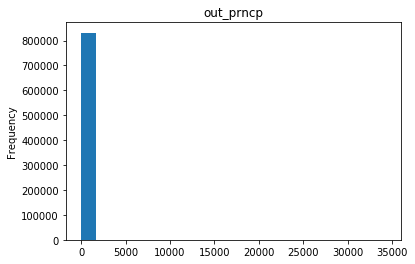

out_prncp_inv


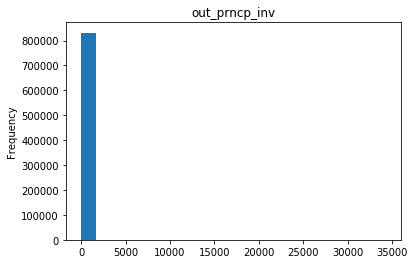

total_pymnt


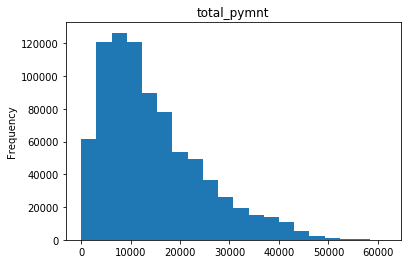

total_pymnt_inv


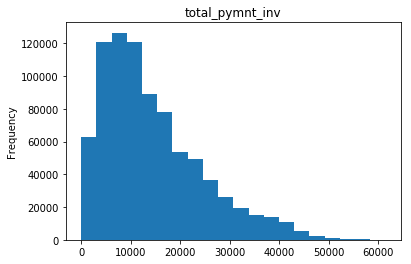

total_rec_prncp


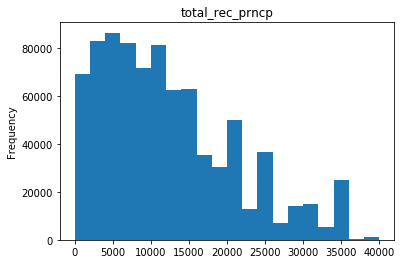

total_rec_int


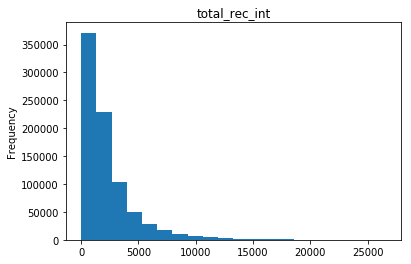

total_rec_late_fee


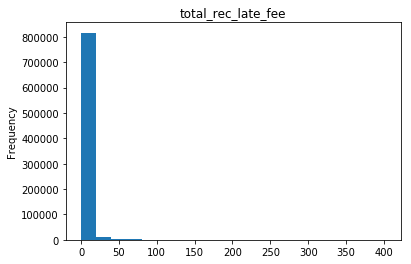

recoveries


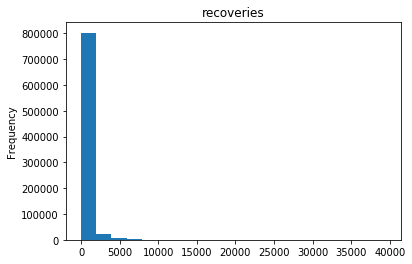

collection_recovery_fee


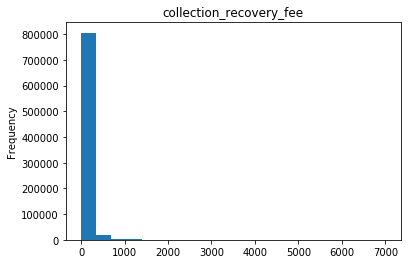

last_pymnt_amnt


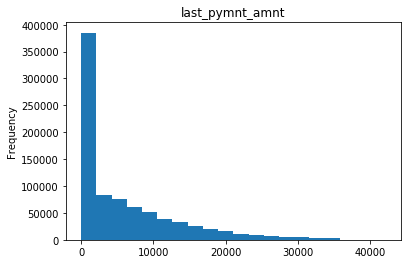

collections_12_mths_ex_med


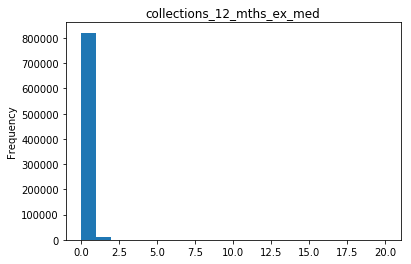

mths_since_last_major_derog


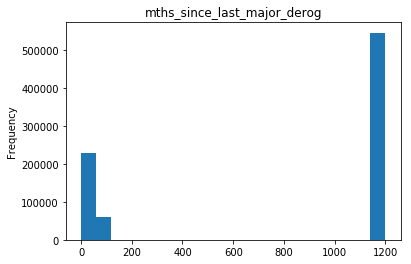

application_type
acc_now_delinq


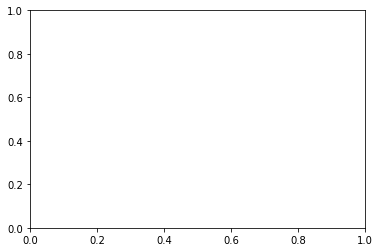

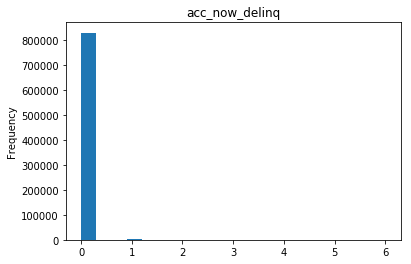

tot_coll_amt


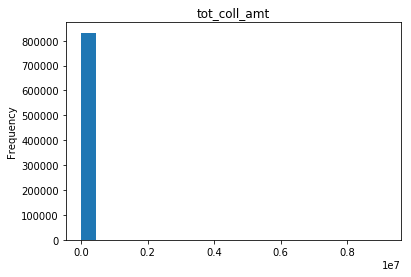

tot_cur_bal


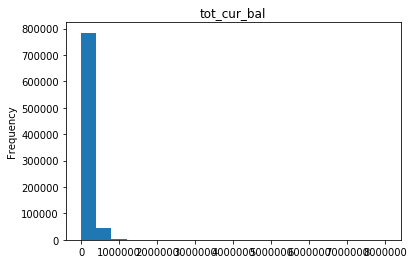

open_acc_6m


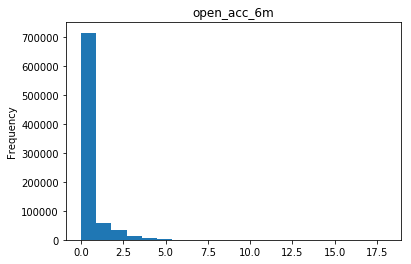

open_act_il


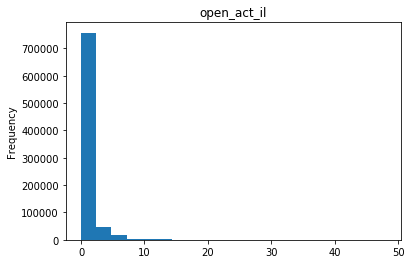

open_il_12m


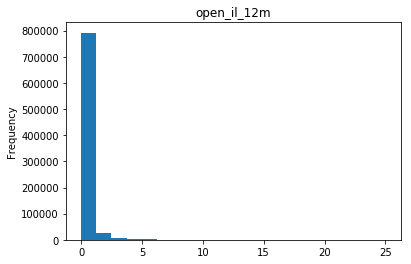

open_il_24m


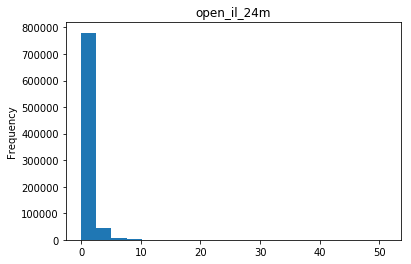

mths_since_rcnt_il


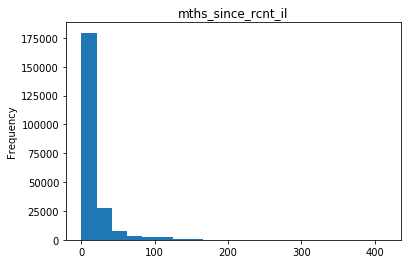

total_bal_il


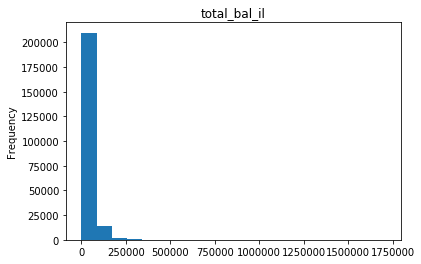

il_util


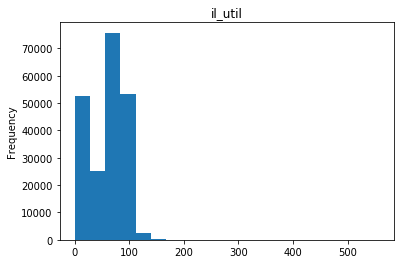

open_rv_12m


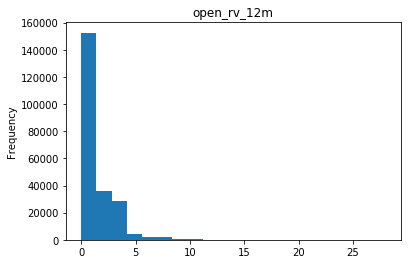

open_rv_24m


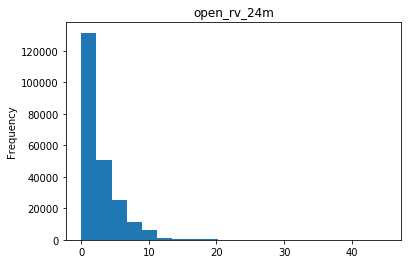

max_bal_bc


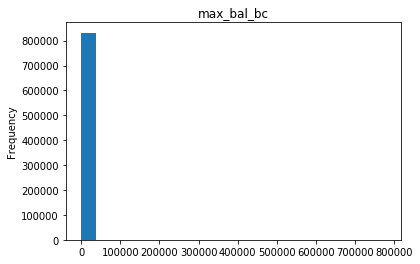

all_util


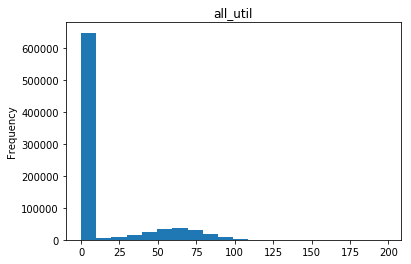

total_rev_hi_lim


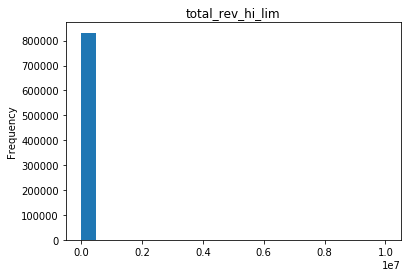

inq_fi


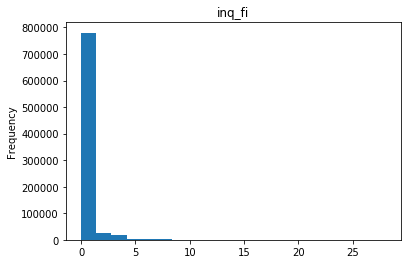

total_cu_tl


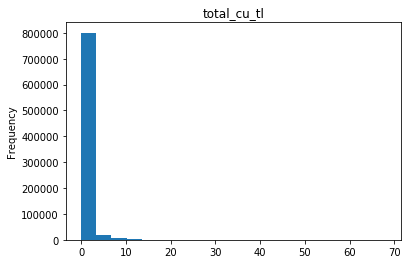

inq_last_12m


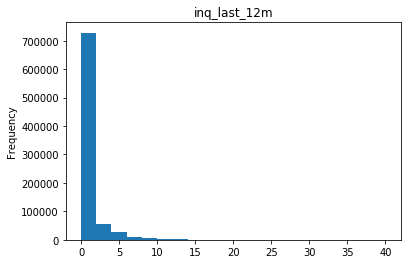

acc_open_past_24mths


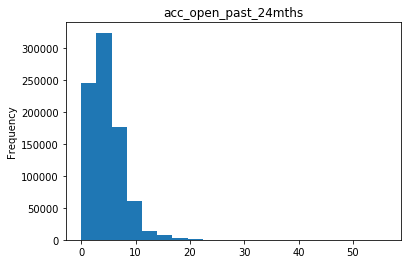

avg_cur_bal


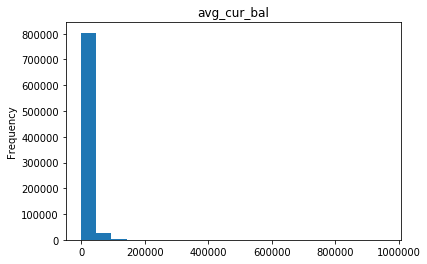

bc_open_to_buy


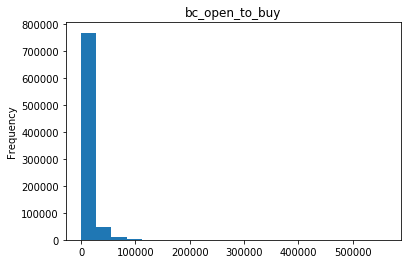

bc_util


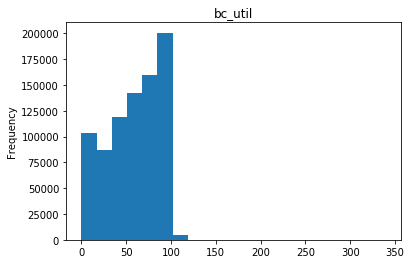

chargeoff_within_12_mths


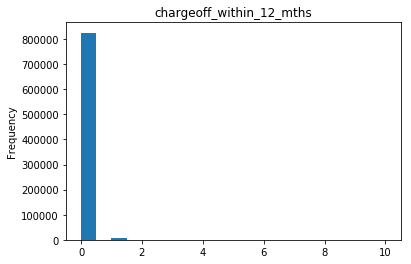

delinq_amnt


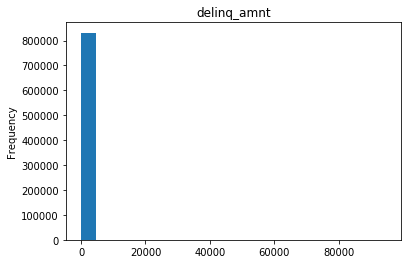

mo_sin_old_il_acct


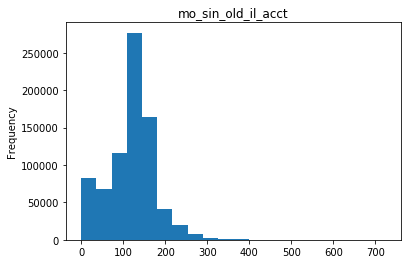

mo_sin_old_rev_tl_op


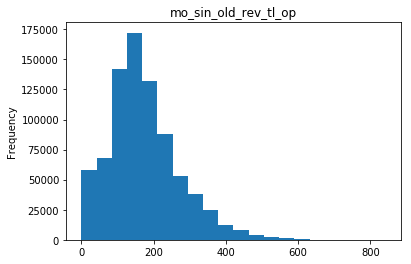

mo_sin_rcnt_rev_tl_op


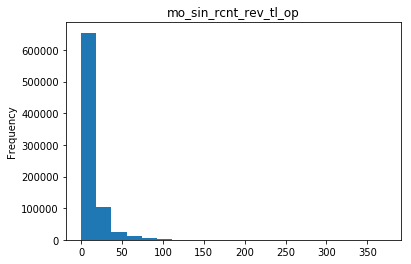

mo_sin_rcnt_tl


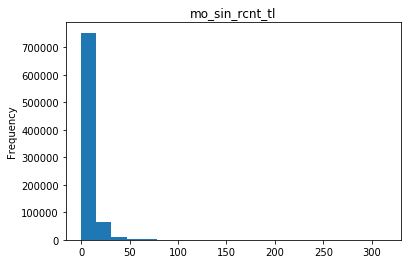

mort_acc


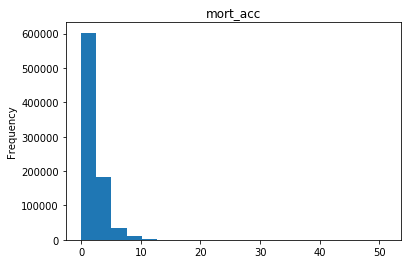

mths_since_recent_bc


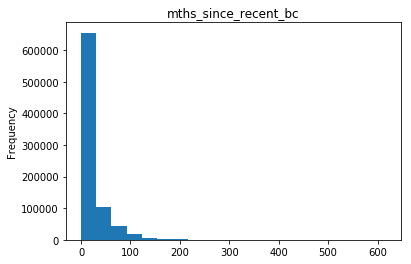

mths_since_recent_bc_dlq


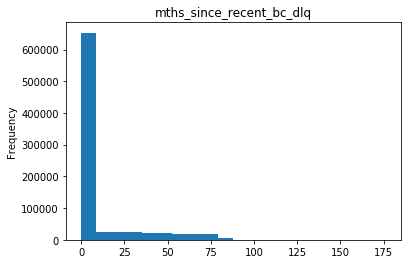

mths_since_recent_inq


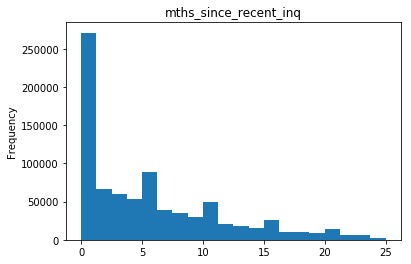

mths_since_recent_revol_delinq


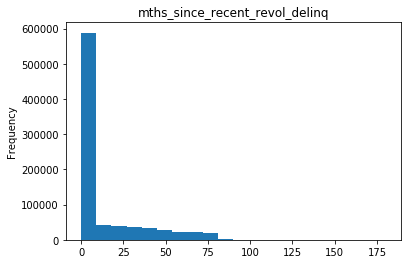

num_accts_ever_120_pd


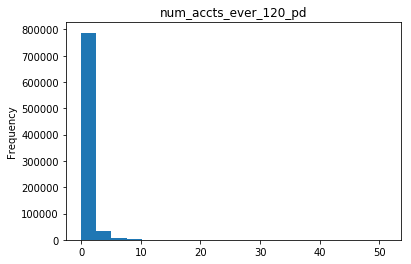

num_actv_bc_tl


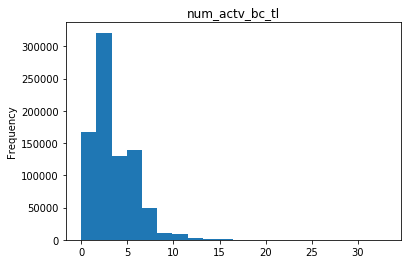

num_actv_rev_tl


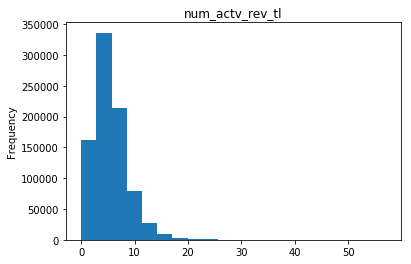

num_bc_sats


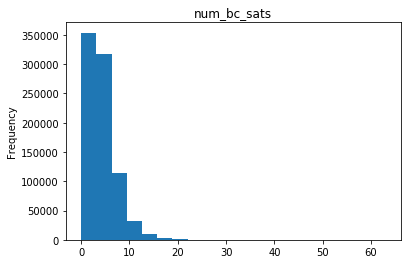

num_bc_tl


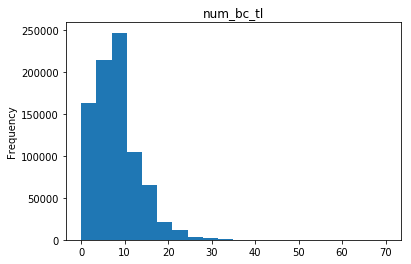

num_il_tl


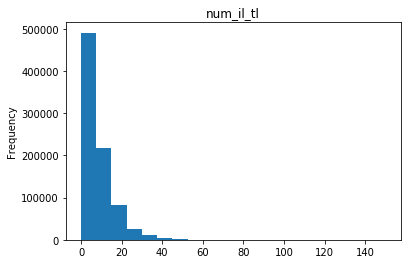

num_op_rev_tl


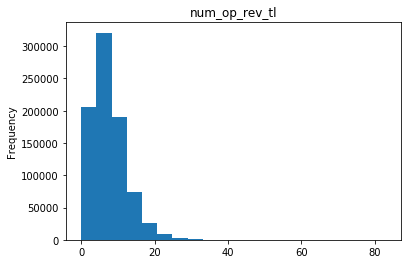

num_rev_accts


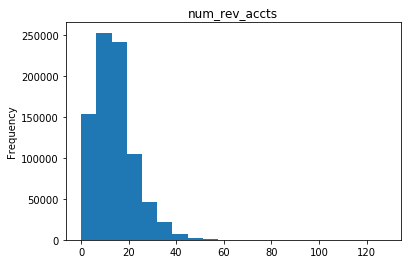

num_rev_tl_bal_gt_0


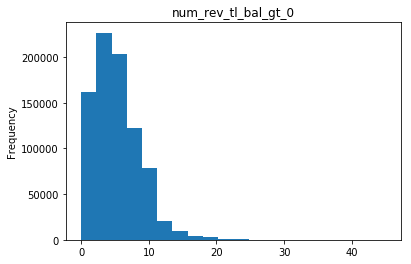

num_sats


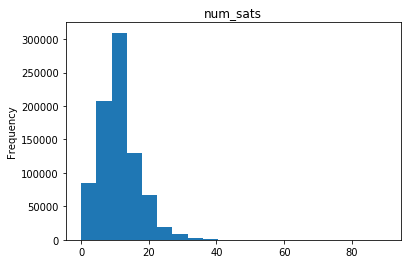

num_tl_120dpd_2m


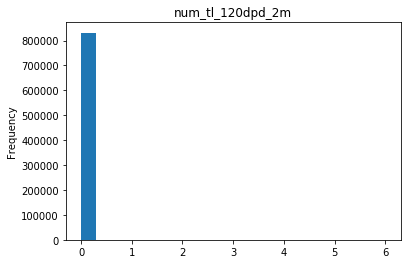

num_tl_30dpd


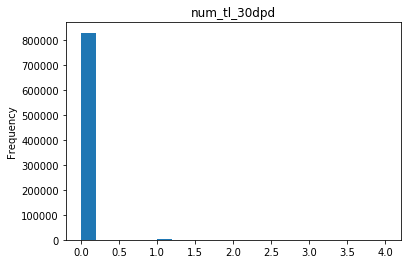

num_tl_90g_dpd_24m


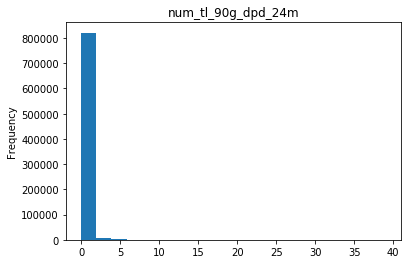

num_tl_op_past_12m


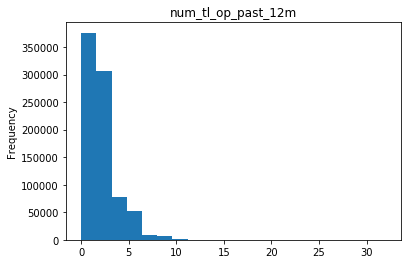

pct_tl_nvr_dlq


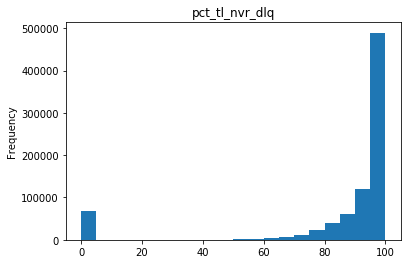

percent_bc_gt_75


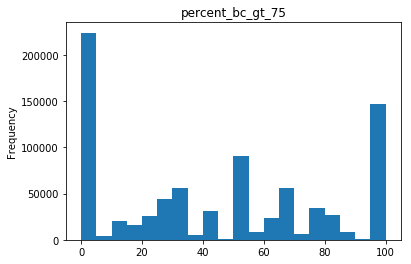

pub_rec_bankruptcies


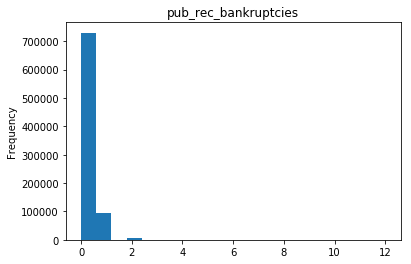

tax_liens


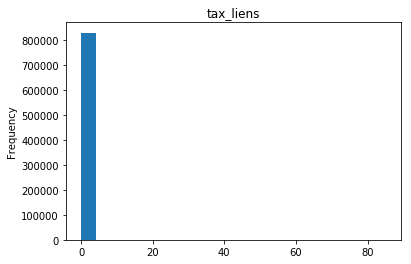

tot_hi_cred_lim


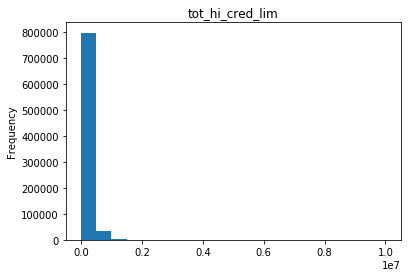

total_bal_ex_mort


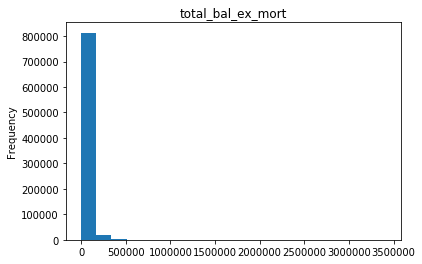

total_bc_limit


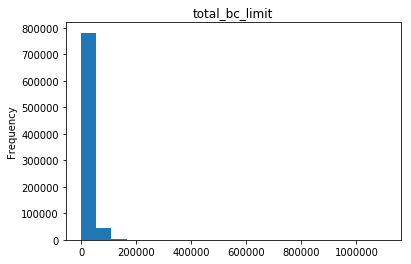

total_il_high_credit_limit


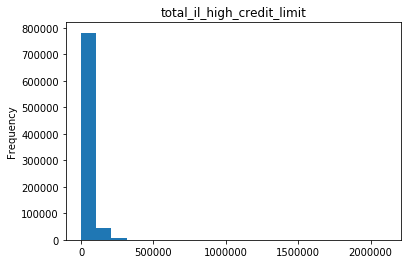

revol_bal_joint


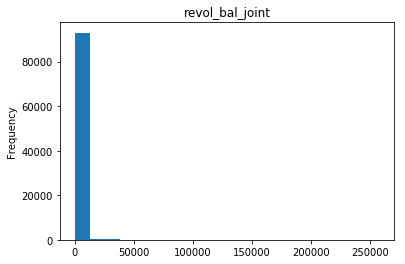

sec_app_earliest_cr_line
sec_app_inq_last_6mths


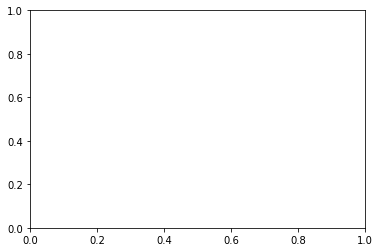

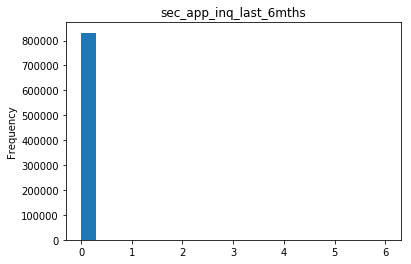

sec_app_mort_acc


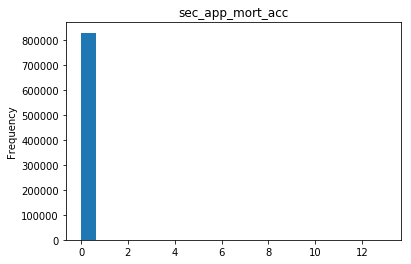

sec_app_open_acc


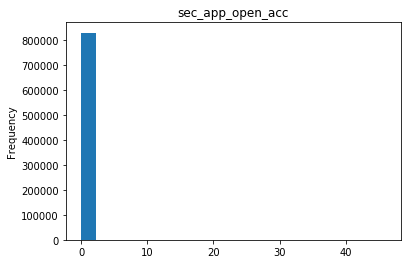

sec_app_revol_util


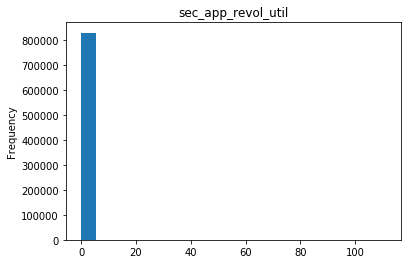

sec_app_open_act_il


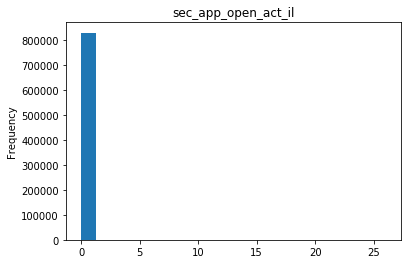

sec_app_num_rev_accts


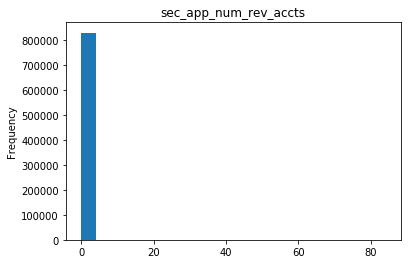

sec_app_chargeoff_within_12_mths


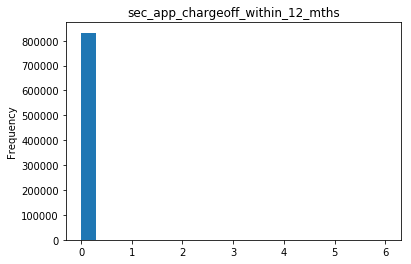

sec_app_collections_12_mths_ex_med


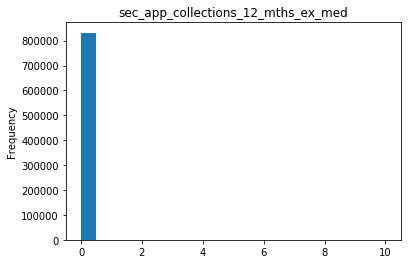

sec_app_mths_since_last_major_derog


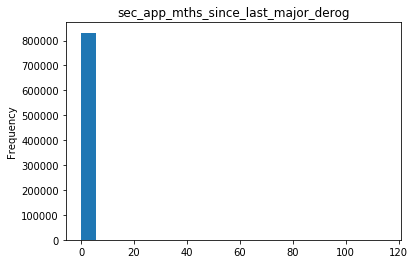

hardship_flag
hardship_type
hardship_reason
hardship_status
deferral_term


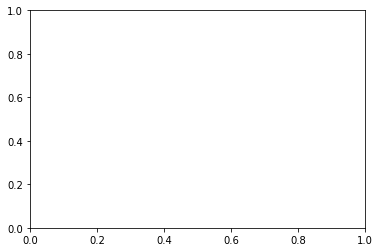

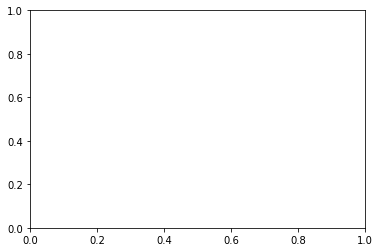

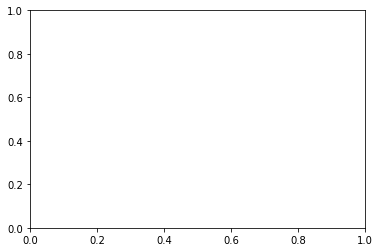

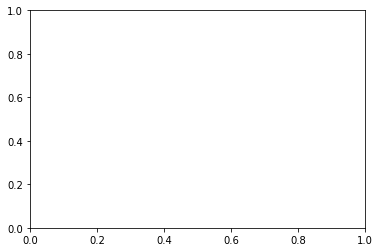

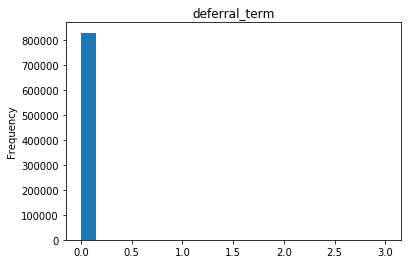

hardship_amount


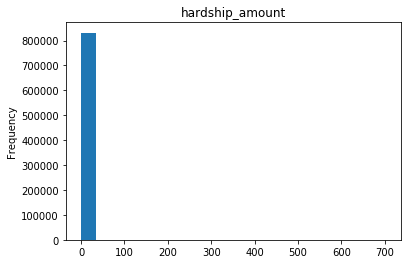

hardship_length


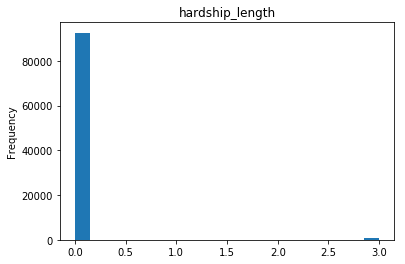

orig_projected_additional_accrued_interest


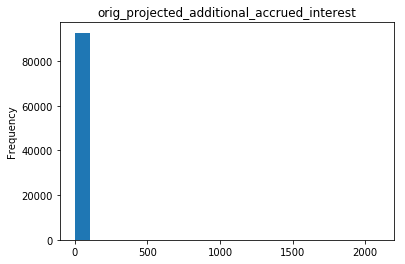

debt_settlement_flag
settlement_status
settlement_amount


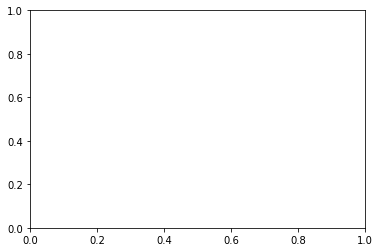

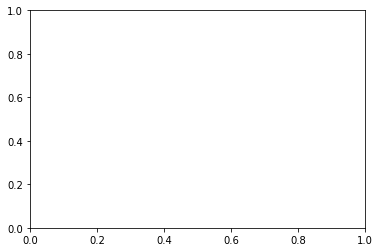

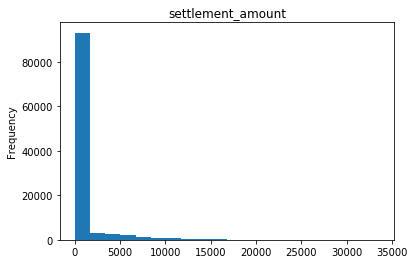

settlement_percentage


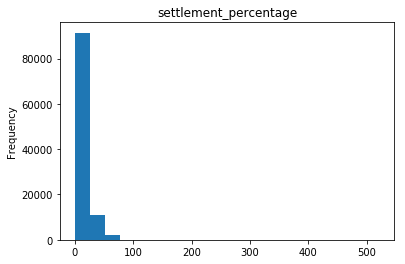

settlement_term


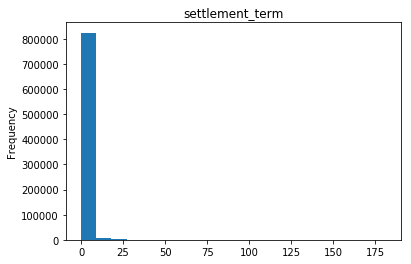

issue_d_month


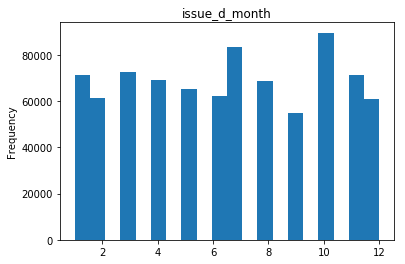

issue_d_year


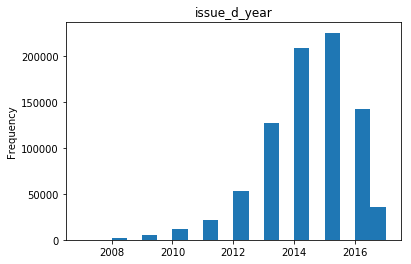

earliest_cr_line_month


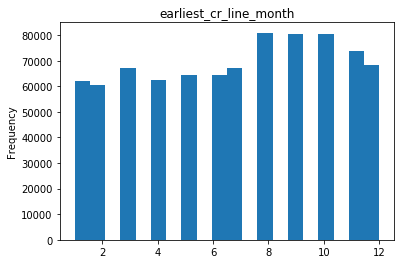

earliest_cr_line_year


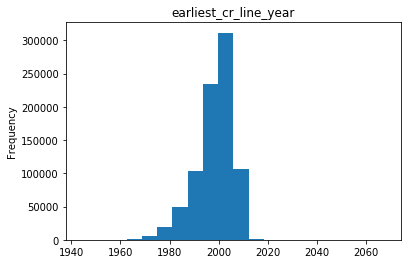

last_pymnt_d_month


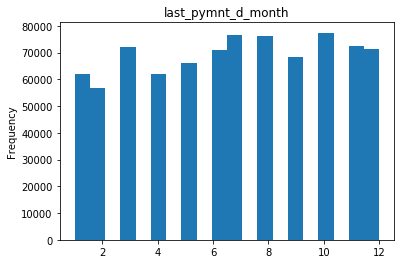

last_pymnt_d_year


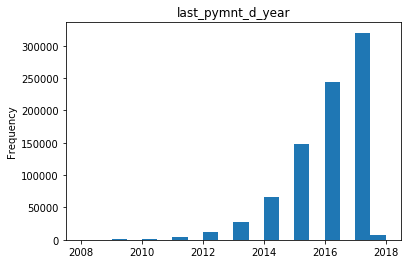

last_credit_pull_d_month


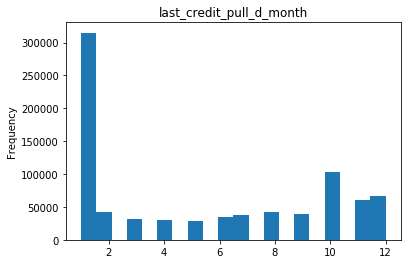

last_credit_pull_d_year


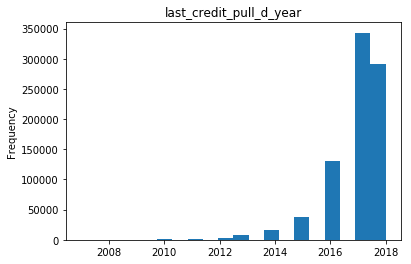

In [16]:
# There is a debate between get_dummies (from pandas) and onehotencoder and vectorizer.
# I have decided to pick get_dummies.

# The following code generates the histogram of the data.
# In case, when the data is not numeric, it does three things.
# 1. Generate a bar-chart. The equivalent of histogram.
# 2. Do one-hot encoding using get_dummies.
# 3. Drop the original column name.

cant_plot_list = []
for y in df.columns:
    print(y)
    try:
        plt.figure()
        df[y].plot.hist(bins=20, title=y)
        plt.show()
    except:
        cant_plot_list.append(y)
        # df.groupby(y).size().plot(kind='bar', title=y)
        # plt.show()
        # df = df.join(pd.get_dummies(df[y], prefix=y))
        # df.drop(y, axis=1, inplace=True)
        # plt.show()


In [17]:
print(cant_plot_list)

['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'application_type', 'sec_app_earliest_cr_line', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'debt_settlement_flag', 'settlement_status']


In [18]:
# Printing the non-numeric items
for y in cant_plot_list:
    print(y)
    print(df[y].unique())

grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'C2' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
emp_length
['10+' '<1' '1' '3' '8' '9' '4' '5' '6' '2' '7' 0]
home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status
['Verified' 'Source Verified' 'Not Verified']
loan_status
['Fully Paid' 'Charged Off']
pymnt_plan
['n']
purpose
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
addr_state
['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'PA' 'MN'
 'NY' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME' 'ND']
initial_list_status
['f' 'w']
application_type
['Individual' 

In [19]:
# Removing sec_app_earliest_cr_line as the information available for secondary application is not very clean and consisten.
# This should have been removed at the previous python notebook
df = df.drop('sec_app_earliest_cr_line', 1)
cant_plot_list.remove('sec_app_earliest_cr_line')

# Remvoving hardship_flag as there only one value 
df = df.drop('hardship_flag', 1)
cant_plot_list.remove('hardship_flag')

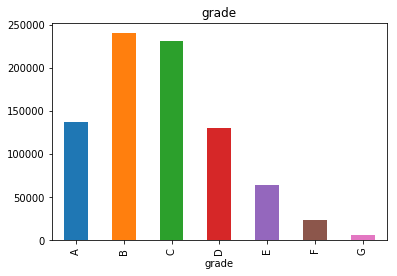

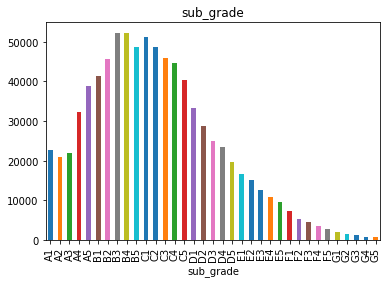

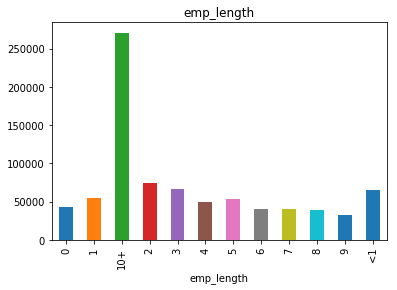

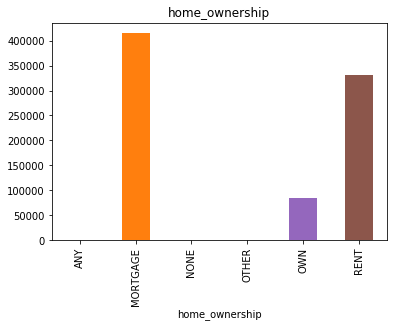

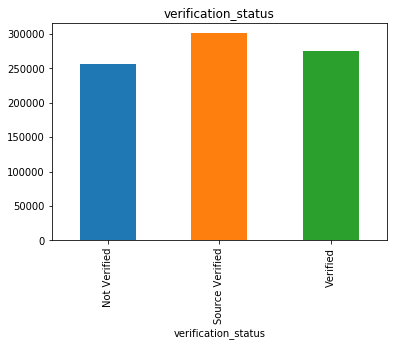

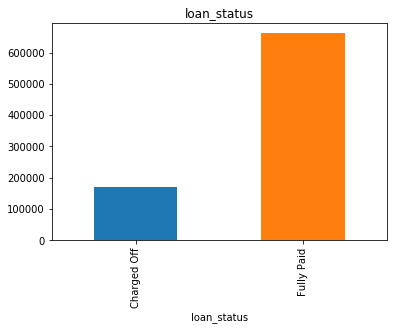

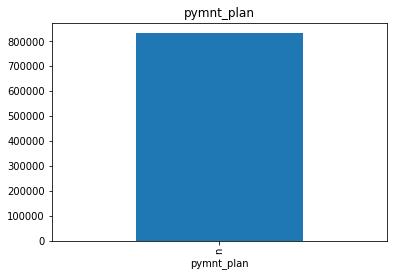

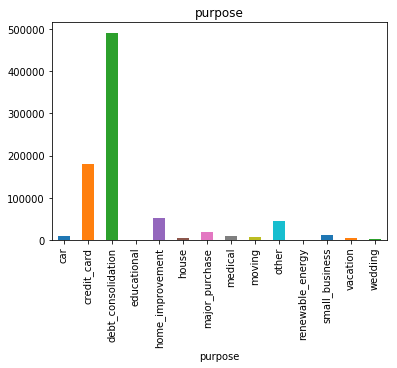

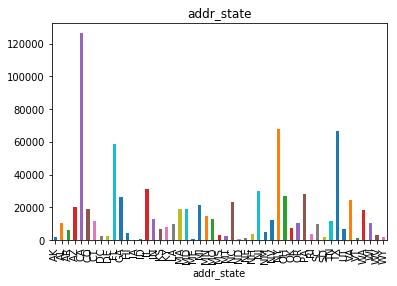

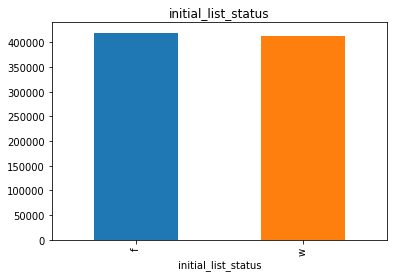

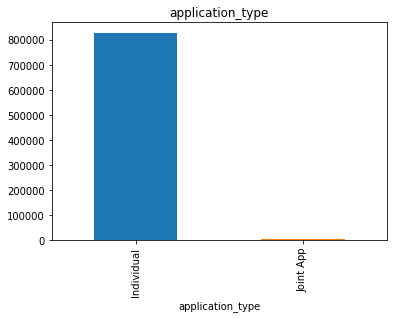

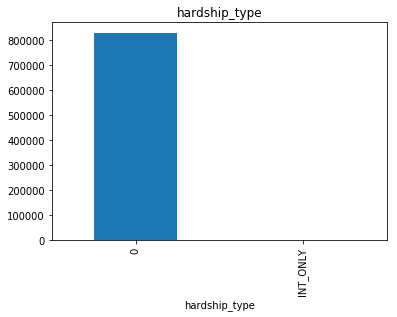

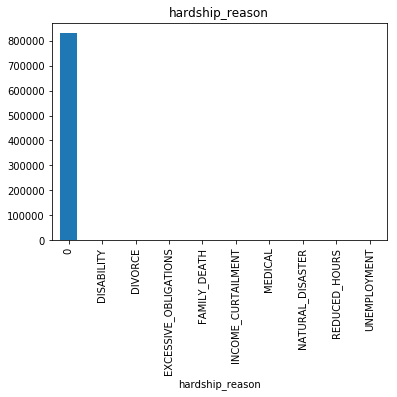

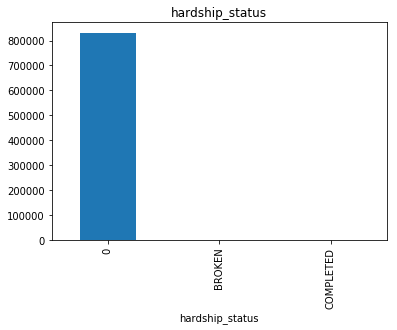

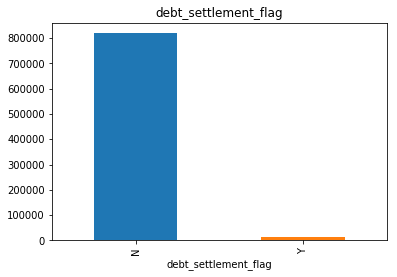

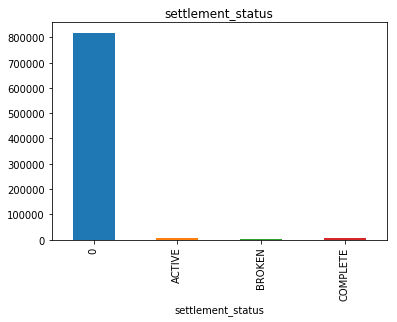

In [20]:
# Plotting the non-numeric items
for y in cant_plot_list:
    df.groupby(y).size().plot(kind='bar', title=y)
    plt.show()

### Remove all settlement and hardship kind of features
These features are populated only after the loan has started.
Hence, remove all the following types.
1. hardship_type: INT_ONLY
2. hardship_reason: Everything other than 0
3. hardship_status: Everything other than 0
4. debt_settlement_flag: Y
5. settlement_status: Everything other than 0

And then drop those features

In [21]:
# Using try-except as some of them would be already dropped from the previous line
df.drop(df[df.hardship_type == 'INT_ONLY'].index, inplace=True)
try:
    df.drop(df[df.hardship_reason != '0'].index, inplace=True)
except:
    pass

try:
    df.drop(df[df.hardship_status != '0'].index, inplace=True)
except:
    pass

try:
    df.drop(df[df.debt_settlement_flag == 'Y'].index, inplace=True)
except:
    pass

try:
    df.drop(df[df.settlement_status != '0'].index, inplace=True)
except:
    pass

df = df.drop('hardship_type', 1)
df = df.drop('hardship_reason', 1)
df = df.drop('hardship_status', 1)
df = df.drop('debt_settlement_flag', 1)
df = df.drop('settlement_status', 1)

In [22]:
# Looking at the above plots, homeownership has values like 'other', 'none' and 'any', the number of which are too low.
print(len(df.loc[df['home_ownership'].isin(['OTHER', 'NONE', 'ANY'])]))

272


In [23]:
# Since, there are only 290 items, we can delete those
df.drop(df[df.home_ownership.isin(['OTHER', 'NONE', 'ANY'])].index, inplace=True)
print(len(df.loc[df['home_ownership'].isin(['OTHER', 'NONE', 'ANY'])]))
print(len(df))

0
785595


In [24]:
# Remove id and member_id as they are not used here
df = df.drop('id', 1)
df = df.drop('member_id', 1)

In [31]:
import operator

# Find all the NaN left
x_pct = {}
length = len(df)
for y in df.columns:
    if df[y].isnull().sum() > 0:
        x_cnt = df[y].isnull().sum()
        x_pct[y] = 100.0*x_cnt/length
        # print(df[y].unique())
        
x_pct_list = sorted(x_pct.items(), key=operator.itemgetter(1), reverse=True)
        
for f, val in x_pct_list:
    print(f, val)
    print(loan_dict.loc[loan_dict['LoanStatNew'] == f]['Description'])
    print('------')

hardship_length 89.07923293809151
137    The number of months the borrower will make smaller payments than normally obligated due to a hardship plan
Name: Description, dtype: object
------
orig_projected_additional_accrued_interest 89.07923293809151
140    The original projected additional interest amount that will accrue for the given hardship payment plan as of the Hardship Start Date. This field will be null if the borrower has broken their hardship payment plan.
Name: Description, dtype: object
------
settlement_amount 89.07923293809151
148    The loan amount that the borrower has agreed to settle for
Name: Description, dtype: object
------
settlement_percentage 89.07923293809151
149    The settlement amount as a percentage of the payoff balance amount on the loan
Name: Description, dtype: object
------
revol_bal_joint 88.93539291874312
Series([], Name: Description, dtype: object)
------
il_util 75.32952730096297
28    Ratio of total current balance to high credit/credit limit on a

In [ ]:
# At this time the data is ready to be used for benchmark prediction
# It is done in other jupyter notebooks.
df.to_pickle('data_cleaned.pkl')